## Task 1. Experimental time complexity analysis

### Section 1

In [1]:
import numpy as np
import time 
import random 
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns  
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = (100)

Implementing functions

In [2]:
def f_const(lst, n):
    return n


def f_sum(lst, n):
    s = 0
    for i in range(n):
        s += lst[i]
    return s


def f_product(lst, n):
    p = 0
    for i in range(n):
        p *= lst[i]
    return p


def f_polynom(lst, n):
    s = 0
    for i in range(n):
        s += lst[i] * (1.5**(i))
    return s


def f_polynom_gorner(lst, n):
    s = 0
    for i in range(n):
        s = s * 1.5 + lst[i]
    return s


def bubble_sort(lst, n):
    for i in range(n):
        for j in range(n - 1):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
    return lst
    

def quick_sort(lst, n):
    return np.sort(lst, kind='quicksort')
    
        
def tim_sort(lst, n):
    return np.sort(lst, kind='stable')

In [3]:
def calculate_time(f, v, n):
        start_time = time.time()
        f(v, n)
        return round(time.time() - start_time, 5)

In [4]:
k = 2000
functions_lst = [f_const, f_sum, f_product, f_polynom, f_polynom_gorner, bubble_sort, quick_sort, tim_sort]
functions_results = defaultdict(lambda: [])

for n in range(1, k+1):
    lst = np.random.randint(1, 100, n)
    for f in functions_lst: # run and apply every function 
        result = []
        for i in range(5):
            try: # we need try/except block because of memory overflow during the polynom calculation
                result.append(calculate_time(f, lst, n)) # calculate time for each iteration
            except:
                break
        functions_results[f].append(np.mean(result)) # find average time

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in multiply
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Visualization

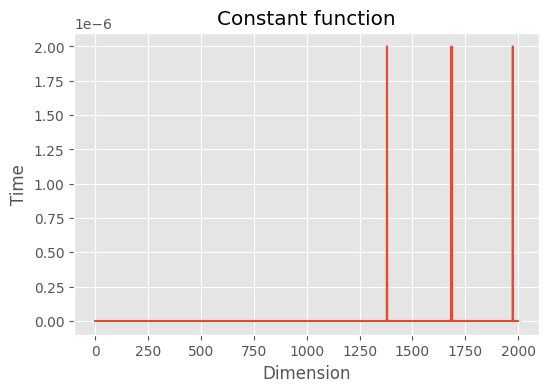

In [5]:
plt.plot(functions_results[f_const])
plt.xlabel('Dimension')
plt.ylabel('Time')
plt.title('Constant function')
plt.show()

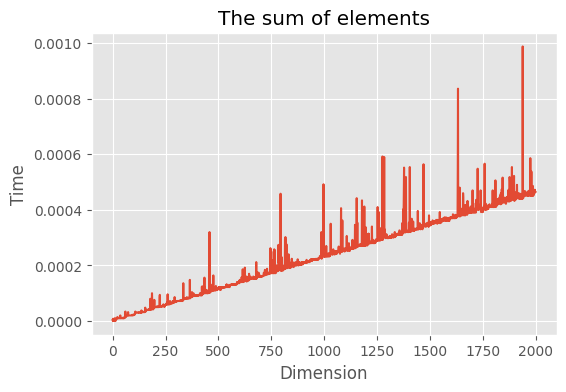

In [6]:
plt.plot(functions_results[f_sum])
plt.xlabel('Dimension')
plt.ylabel('Time')
plt.title('The sum of elements')
plt.show()

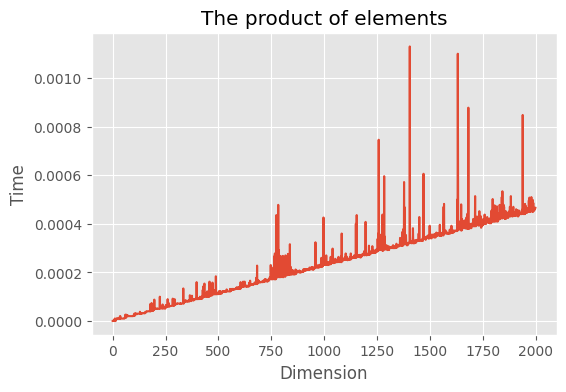

In [7]:
plt.plot(functions_results[f_product])
plt.xlabel('Dimension')
plt.ylabel('Time')
plt.title('The product of elements')
plt.show()

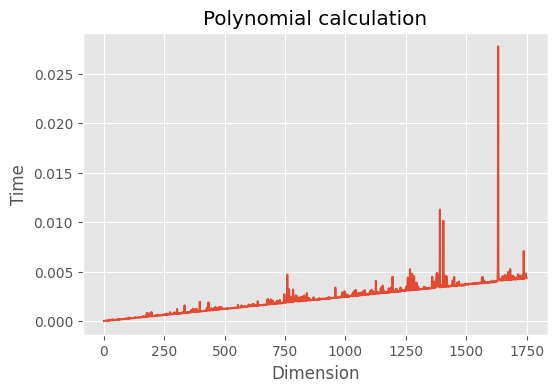

In [8]:
plt.plot(functions_results[f_polynom])
plt.xlabel('Dimension')
plt.ylabel('Time')
plt.title('Polynomial calculation')
plt.show()

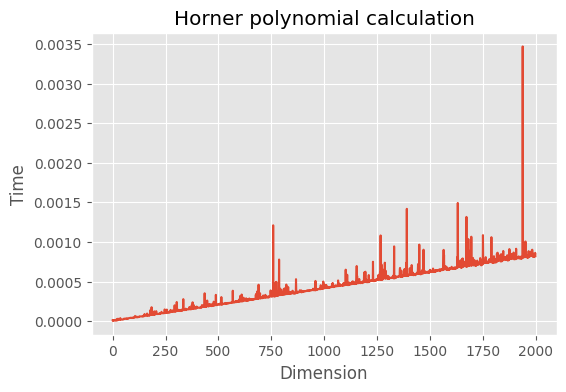

In [9]:
plt.plot(functions_results[f_polynom_gorner])
plt.xlabel('Dimension')
plt.ylabel('Time')
plt.title('Horner polynomial calculation')
plt.show()

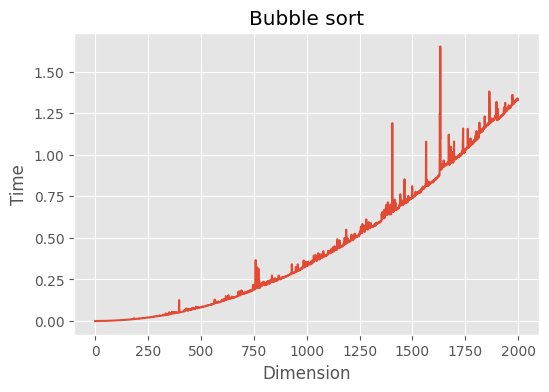

In [10]:
plt.plot(functions_results[bubble_sort])
plt.xlabel('Dimension')
plt.ylabel('Time')
plt.title('Bubble sort')
plt.show()

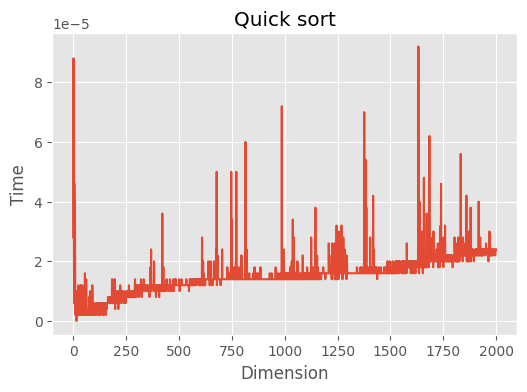

In [11]:
plt.plot(functions_results[quick_sort])
plt.xlabel('Dimension')
plt.ylabel('Time')
plt.title('Quick sort')
plt.show()

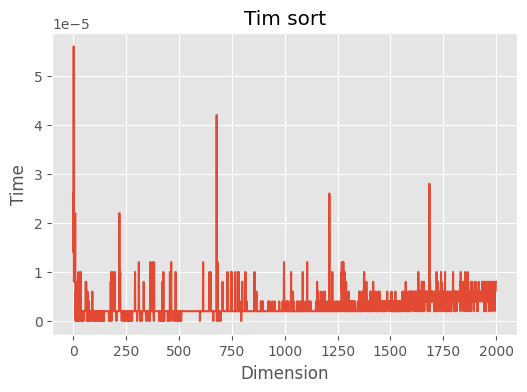

In [12]:
plt.plot(functions_results[tim_sort])
plt.xlabel('Dimension')
plt.ylabel('Time')
plt.title('Tim sort')
plt.show()

### Section 2

Implementing functions

In [21]:
def calculate_time(f, A, B, n):
        start_time = time.time()
        matrix_product(A, B, n)
        return round(time.time() - start_time, 6)

In [22]:
def matrix_product(A, B, n):
    result_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                   result_matrix[i][j] += A[i][k] * B[k][j]
    return result_matrix

In [23]:
n = 5
A = np.random.random((n, n))
B = np.random.random((n, n))
result_matrix = matrix_product(A, B, n)
np.allclose(result_matrix, A. dot(B)) # checking correctness of our function

True

In [29]:
k = 100 # we decrease range because of computer performance limitation
function_result = []

for n in range(1, k+1):
    A = np.random.random((n, n))
    B = np.random.random((n, n))
    result = []
    for i in range(5):
        result.append(calculate_time(matrix_product, A, B, n))  # calculating time
    function_result.append(np.mean(result)) # find average time 

Visualization

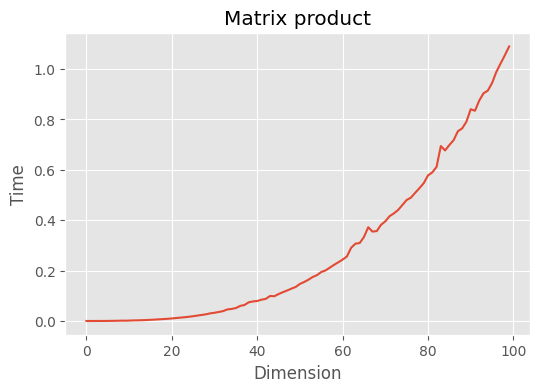

In [30]:
plt.plot(function_result)
plt.xlabel('Dimension')
plt.ylabel('Time')
plt.title('Matrix product')
plt.show()